<h1><center>Dependencies Installation</center></h1>

In [656]:
%pip install pandas==2.2.2
%pip install tensorflow==2.17.0
%pip install matplotlib==3.9.2
%pip install seaborn==0.13.2
%pip install scikit-learn==1.5.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<h1><center>Data Preparation</center></h1>

<h2>1. Import all necessary libraries</h2>

In [682]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from typing import List

<h2>2. Read in the dataset</h2>

In [658]:
ROOT_DIR: str = Path().resolve().parent
DATA_DIR: str = os.path.join(ROOT_DIR, 'data')

df: pd.DataFrame = pd.read_csv(f'{DATA_DIR}/almond.csv').drop(columns=["Unnamed: 0"])

In [659]:
df.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [660]:
df.tail()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
2798,NaN,192.709366,122.356506,18471.5,653.345233,NaN,0.931000,1.838965,NaN,NaN,0.725739,19840.5,SANORA
2799,NaN,186.254745,118.708961,17213.5,581.688379,NaN,0.952706,1.564234,NaN,NaN,0.714016,18068.0,SANORA
2800,NaN,186.196182,119.147224,17510.5,608.315795,NaN,0.948821,1.681705,NaN,NaN,0.718999,18455.0,SANORA
2801,NaN,188.660828,120.634438,17941.0,630.759446,NaN,0.944810,1.764701,NaN,NaN,0.738191,18989.0,SANORA
2802,269.356903,176.023636,NaN,36683.5,887.310743,0.643761,0.947380,1.707933,1.530231,0.75693,0.722429,38721.0,SANORA


In [661]:
df.columns

Index(['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness',
       'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)',
       'Type'],
      dtype='object')

<h2>3. Sanity-check on the dataset</h2>

<h3>3.1. Find and drop duplicates across rows</h3>

In [662]:
df.duplicated().sum()

3

In [663]:
df.drop_duplicates(inplace=True)

In [664]:
df.duplicated().sum()

0

<h3>3.2. Check the shape of the dataset and see if there are any null values in columns</h3>


In [665]:
df.shape

(2800, 13)

In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       1944 non-null   float64
 1   Width (minor axis)        1859 non-null   float64
 2   Thickness (depth)         1797 non-null   float64
 3   Area                      2800 non-null   float64
 4   Perimeter                 2800 non-null   float64
 5   Roundness                 1944 non-null   float64
 6   Solidity                  2800 non-null   float64
 7   Compactness               2800 non-null   float64
 8   Aspect Ratio              1003 non-null   float64
 9   Eccentricity              1003 non-null   float64
 10  Extent                    2800 non-null   float64
 11  Convex hull(convex area)  2800 non-null   float64
 12  Type                      2800 non-null   object 
dtypes: float64(12), object(1)
memory usage: 306.2+ KB


In [667]:
df.isnull().sum()

Length (major axis)          856
Width (minor axis)           941
Thickness (depth)           1003
Area                           0
Perimeter                      0
Roundness                    856
Solidity                       0
Compactness                    0
Aspect Ratio                1797
Eccentricity                1797
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [668]:
(df.isnull().sum() / df.shape[0]) * 100

Length (major axis)         30.571429
Width (minor axis)          33.607143
Thickness (depth)           35.821429
Area                         0.000000
Perimeter                    0.000000
Roundness                   30.571429
Solidity                     0.000000
Compactness                  0.000000
Aspect Ratio                64.178571
Eccentricity                64.178571
Extent                       0.000000
Convex hull(convex area)     0.000000
Type                         0.000000
dtype: float64

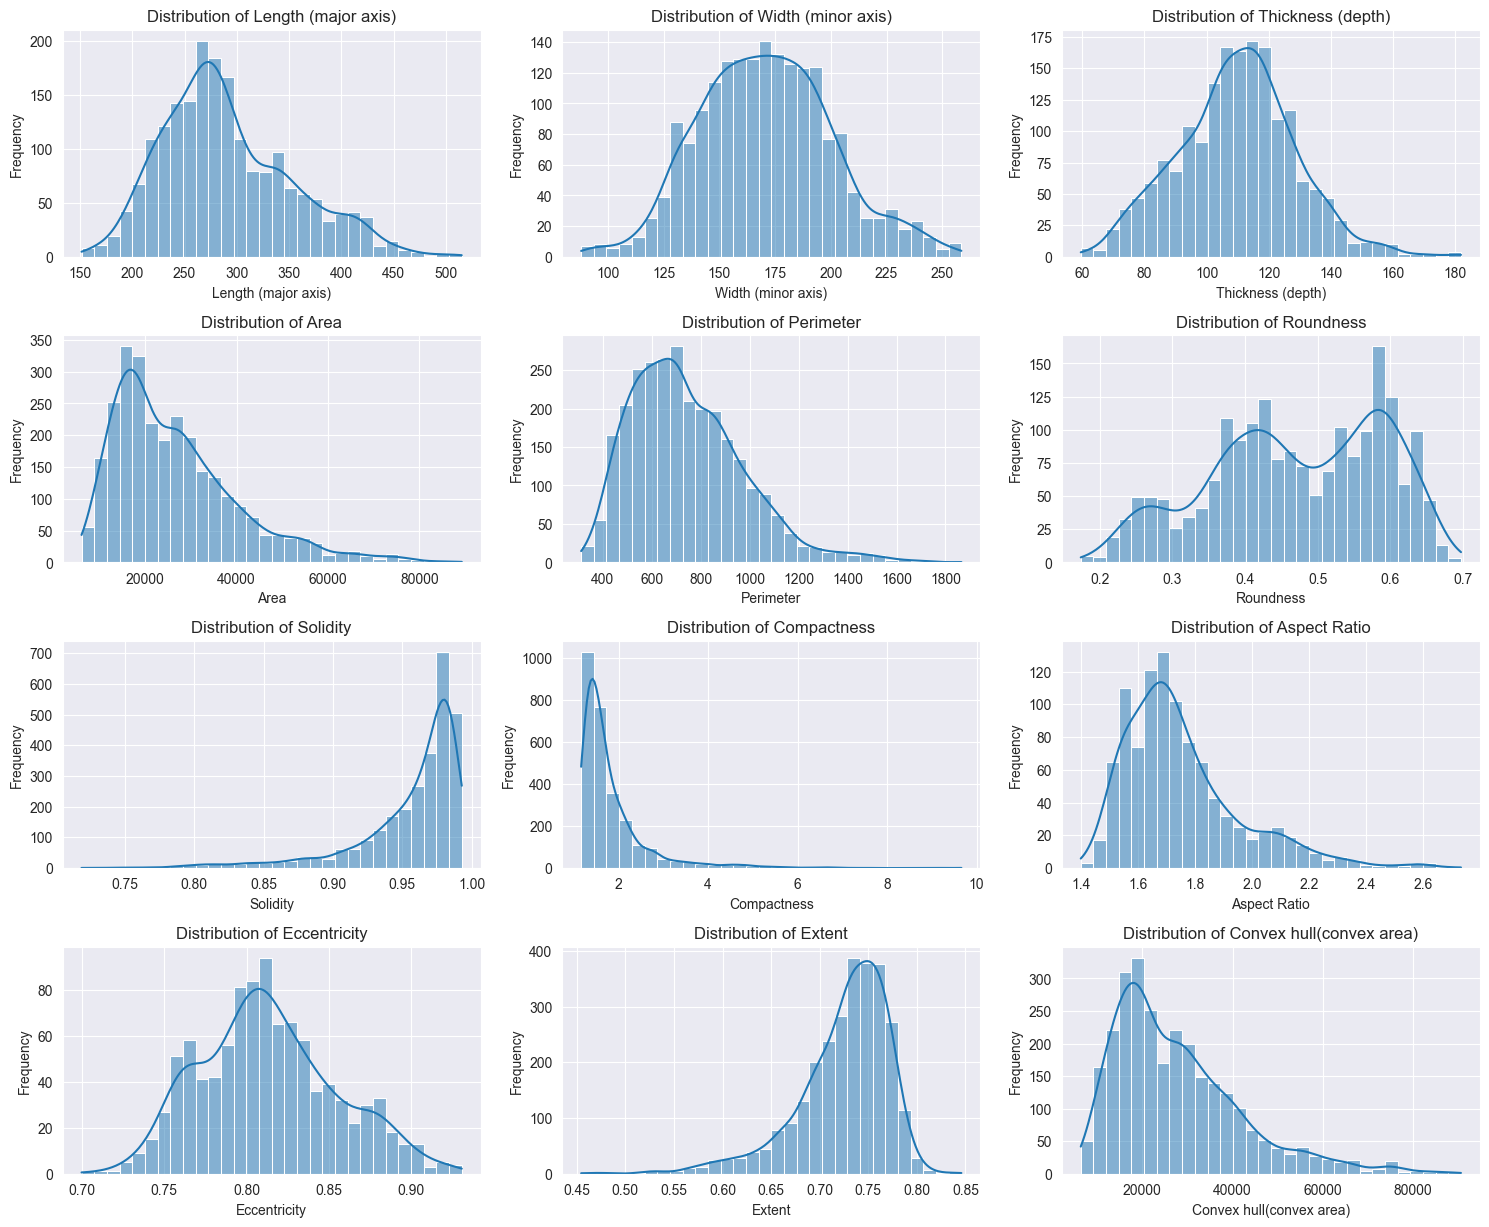

In [669]:
numeric_columns = df.columns

# Plot distributions for each numeric column
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns, 1):
    if column == 'Type':
        continue
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust the layout: 3 columns in each row
    sns.histplot(df[column], kde=True, bins=30)  # Histogram with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [670]:
for column_name in numeric_columns:
    if column_name != 'Type' and not (-0.5 < df[column_name].skew() < 0.5):
        print(column_name)
        df[column_name] = np.log(df[column_name])

Length (major axis)
Area
Perimeter
Solidity
Compactness
Aspect Ratio
Extent
Convex hull(convex area)


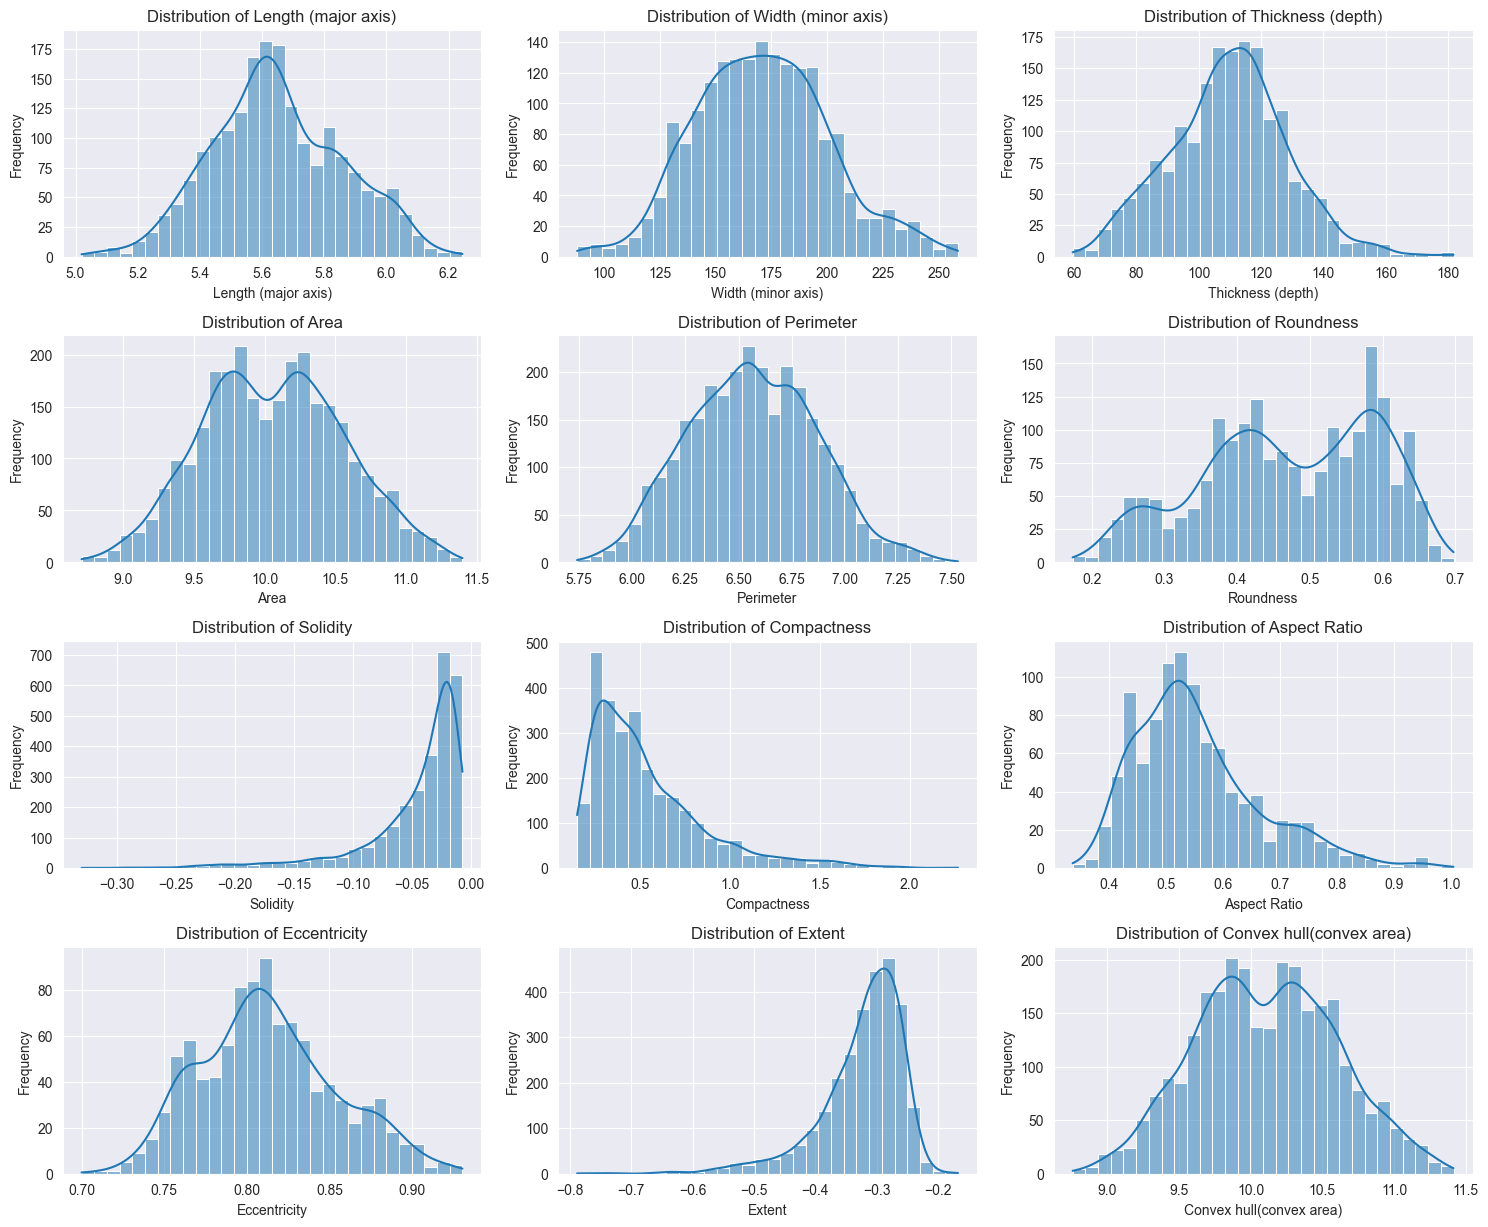

In [671]:
numeric_columns = df.columns

# Plot distributions for each numeric column
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns, 1):
    if column == 'Type':
        continue
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust the layout: 3 columns in each row
    sns.histplot(df[column], kde=True, bins=30)  # Histogram with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h3>3.2. Fill in the missing null values</h3>

In [672]:
# df['Aspect Ratio'] = df['Aspect Ratio'].fillna(
#     df['Area'] / (
#             df['Extent'] * np.where(
#             df['Width (minor axis)'].notna(), 
#         np.power(df['Width (minor axis)'], 2),
#             np.power(df['Length (major axis)'], 2) 
#             
#         )
#     )
# )
# 
# 
# df['Length (major axis)'] = df['Length (major axis)'].fillna(df['Width (minor axis)'] * df['Aspect Ratio'])
# df['Width (minor axis)'] = df['Width (minor axis)'].fillna(df['Length (major axis)'] * df['Aspect Ratio'])
# 
# mask = df['Width (minor axis)'] > df['Length (major axis)']
# df.loc[mask, ['Length (major axis)', 'Width (minor axis)']] = df.loc[mask, ['Width (minor axis)', 'Length (major axis)']].values
# 
# df['Thickness (depth)'] = df['Thickness (depth)'].fillna((df['Length (major axis)'] * df['Aspect Ratio']) / 2)
# 
# df['Roundness'] = df['Roundness'].fillna((4 * np.pi * df['Area']) / (df['Perimeter'] ** 2))
# df['Eccentricity'] = df['Eccentricity'].fillna(
#     np.sqrt(1 - np.power((df['Width (minor axis)'] / 2) / (df['Length (major axis)'] / 2), 2))
# )
# 
# df.isnull().sum()

In [673]:
columns_with_missing_values: List[str] = df.columns[df.isnull().any()].tolist()
knn_imputer: KNNImputer = KNNImputer(n_neighbors=5)
df[columns_with_missing_values] = knn_imputer.fit_transform(df[columns_with_missing_values])
df.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

<h3>3.4. Find garbage values in the target variable 'Type'</h3>


In [674]:
column_name: str = 'Type'
print('****' * 5 + ' START ' + "****" * 5)
print(df[column_name].value_counts())
print('****' * 5 + ' END ' + "****" * 6)

******************** START ********************
Type
SANORA     943
MAMRA      931
REGULAR    926
Name: count, dtype: int64
******************** END ************************


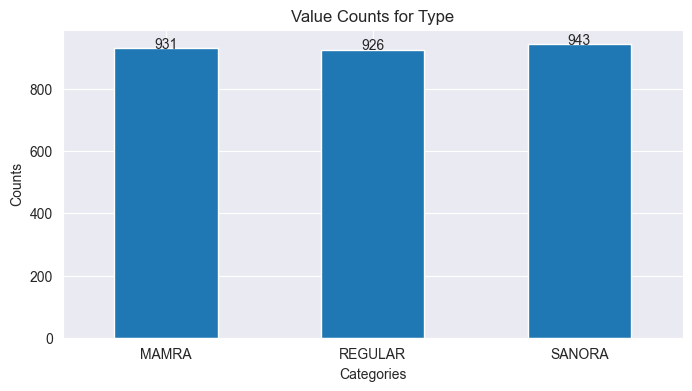

In [675]:
plt.figure(figsize=(8, 4))
type_value_counts = df[column_name].value_counts().sort_index()
ax = type_value_counts.plot(kind='bar')

plt.title(f'Value Counts for {column_name}')
plt.xlabel('Categories')
plt.ylabel('Counts')

for i, v in enumerate(type_value_counts):
    ax.text(i, v + 0.5, str(v), ha='center')
    
plt.xticks(rotation=0)
plt.show()

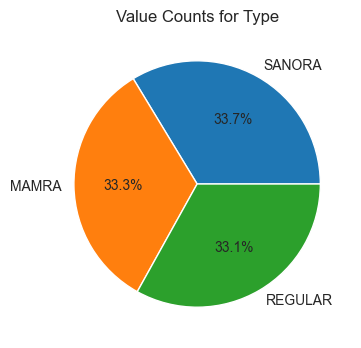

In [676]:
plt.figure(figsize=(8, 4))
df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Value Counts for {column_name}')
plt.ylabel('')  # Optional: Remove the y-label for better aesthetics
plt.show()

<h3>3.5. Encode the Target Variable

In [677]:
label_encoder: LabelEncoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df.head(10)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,5.673988,227.940628,127.759132,10.026546,6.467409,0.435261,-0.026977,0.377248,0.544943,0.813676,-0.383910,10.053523,0
1,5.773174,234.188126,128.199509,10.044900,6.523540,0.386345,-0.043634,0.471156,0.596331,0.834103,-0.421056,10.088535,0
2,5.893441,229.418610,125.796547,10.016213,6.472259,0.373263,-0.033277,0.397279,0.621247,0.843012,-0.380353,10.049491,0
3,5.901122,232.763153,125.918808,10.024753,6.494098,0.323533,-0.035097,0.432418,0.618400,0.842008,-0.377811,10.059850,0
4,5.750088,230.150742,107.253448,9.855767,6.437500,0.341276,-0.049769,0.488209,0.621247,0.843012,-0.335753,9.905535,0
5,5.625785,231.914429,107.759789,9.869672,6.422251,0.384697,-0.043592,0.443806,0.624126,0.844081,-0.317565,9.913265,0
6,5.778433,226.371048,106.479408,9.830029,6.419950,0.376608,-0.044699,0.478847,0.547415,0.812972,-0.317580,9.874728,0
7,5.597912,226.186142,102.623077,9.801981,6.371372,0.374940,-0.031513,0.409740,0.547415,0.812972,-0.300194,9.833494,0
8,6.024602,161.468430,138.190536,10.633256,6.983776,0.309009,-0.050256,0.803272,0.895044,0.912409,-0.264427,10.683512,0
9,6.035984,176.876733,129.659897,10.612274,6.946426,0.295783,-0.045114,0.749554,0.907834,0.914750,-0.276284,10.657389,0


<h2>4. Exploratory Data Analysis (EDA)</h2>

<h3>4.1 Perform statistical analysis on the dataset</h3>

In [678]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length (major axis),2800.0,5.655989,0.190412,5.019498,5.538745,5.649645,5.775380,6.244851
Width (minor axis),2800.0,161.299771,30.887263,88.050529,140.639366,158.792329,181.031261,258.569794
Thickness (depth),2800.0,117.033234,20.147525,59.494278,104.361006,117.119347,131.933393,181.845200
Area,2800.0,10.060986,0.497880,8.705662,9.693630,10.061388,10.417747,11.399555
Perimeter,2800.0,6.565923,0.300712,5.741603,6.348356,6.561235,6.778586,7.530988
Roundness,2800.0,0.464767,0.104252,0.173748,0.394901,0.460754,0.546314,0.697293
Solidity,2800.0,-0.045986,0.043236,-0.330210,-0.056853,-0.029962,-0.018683,-0.007136
Compactness,2800.0,0.539835,0.318676,0.152265,0.305542,0.455128,0.674971,2.268000
Aspect Ratio,2800.0,0.629324,0.136269,0.336531,0.520414,0.593363,0.754952,1.004760
Eccentricity,2800.0,0.837390,0.045228,0.699897,0.801938,0.831079,0.882059,0.930563


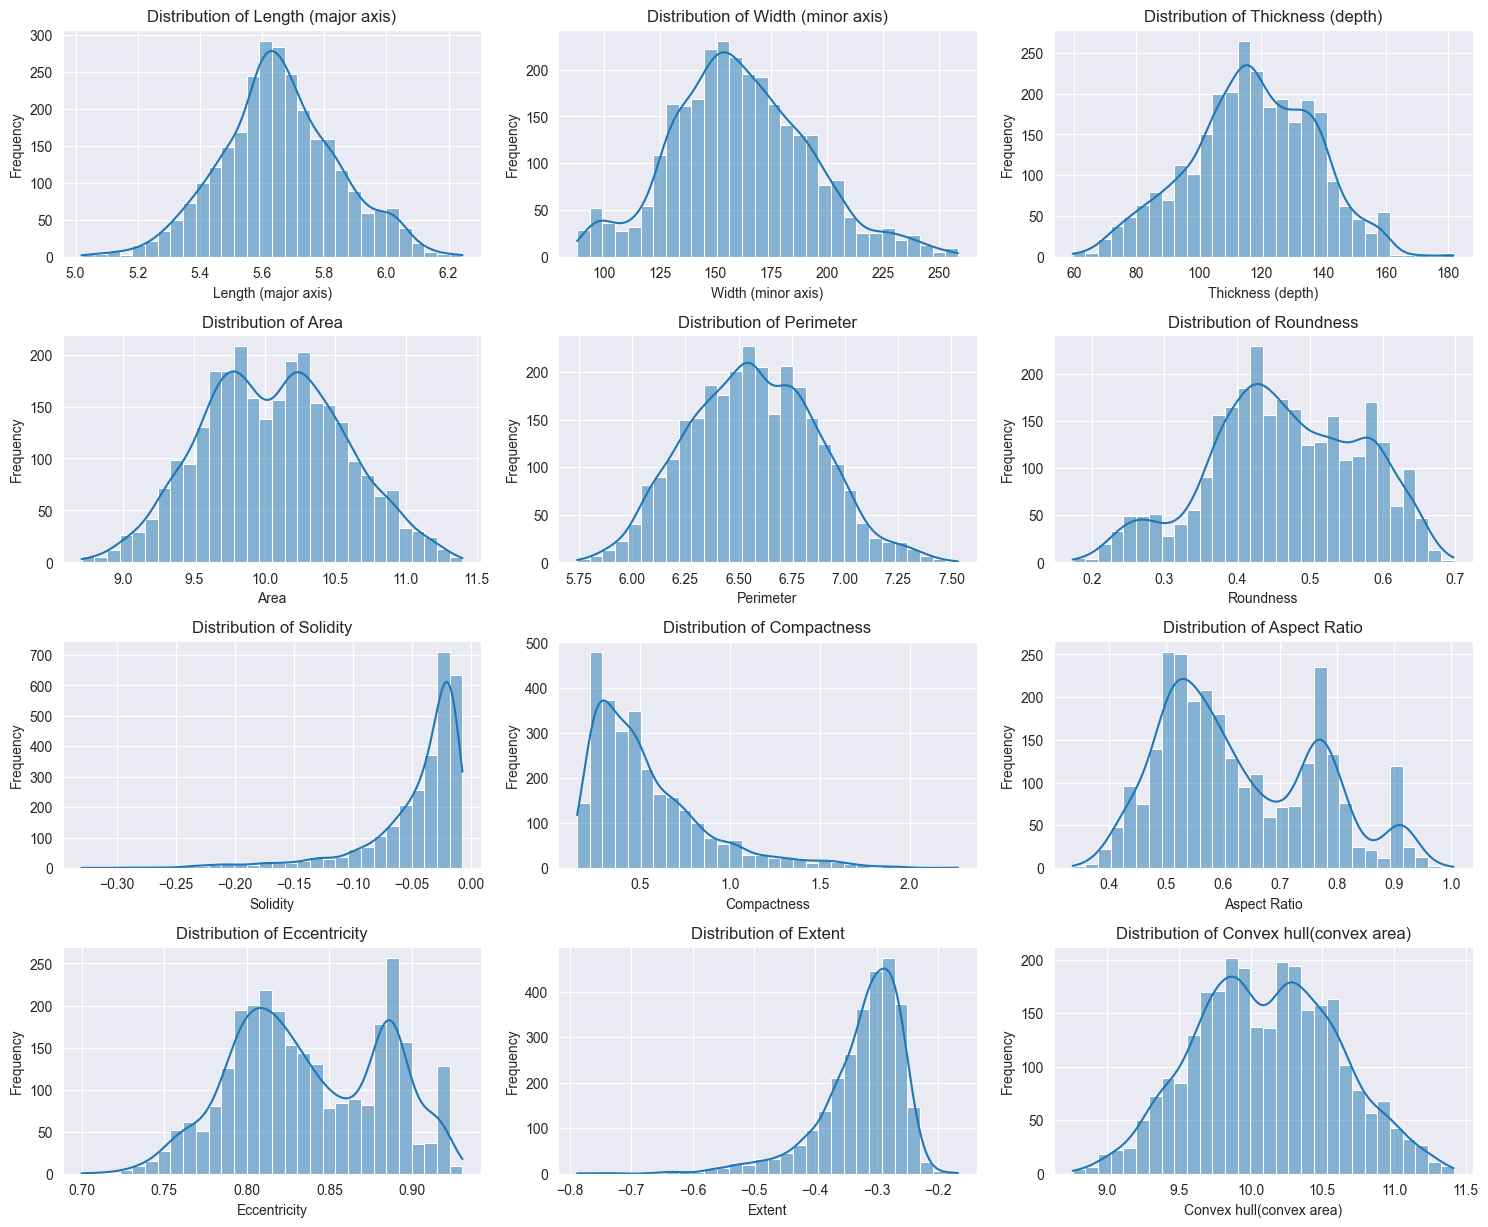

In [679]:
numeric_columns = df.columns

# Plot distributions for each numeric column
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns, 1):
    if column == 'Type':
        continue
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust the layout: 3 columns in each row
    sns.histplot(df[column], kde=True, bins=30)  # Histogram with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

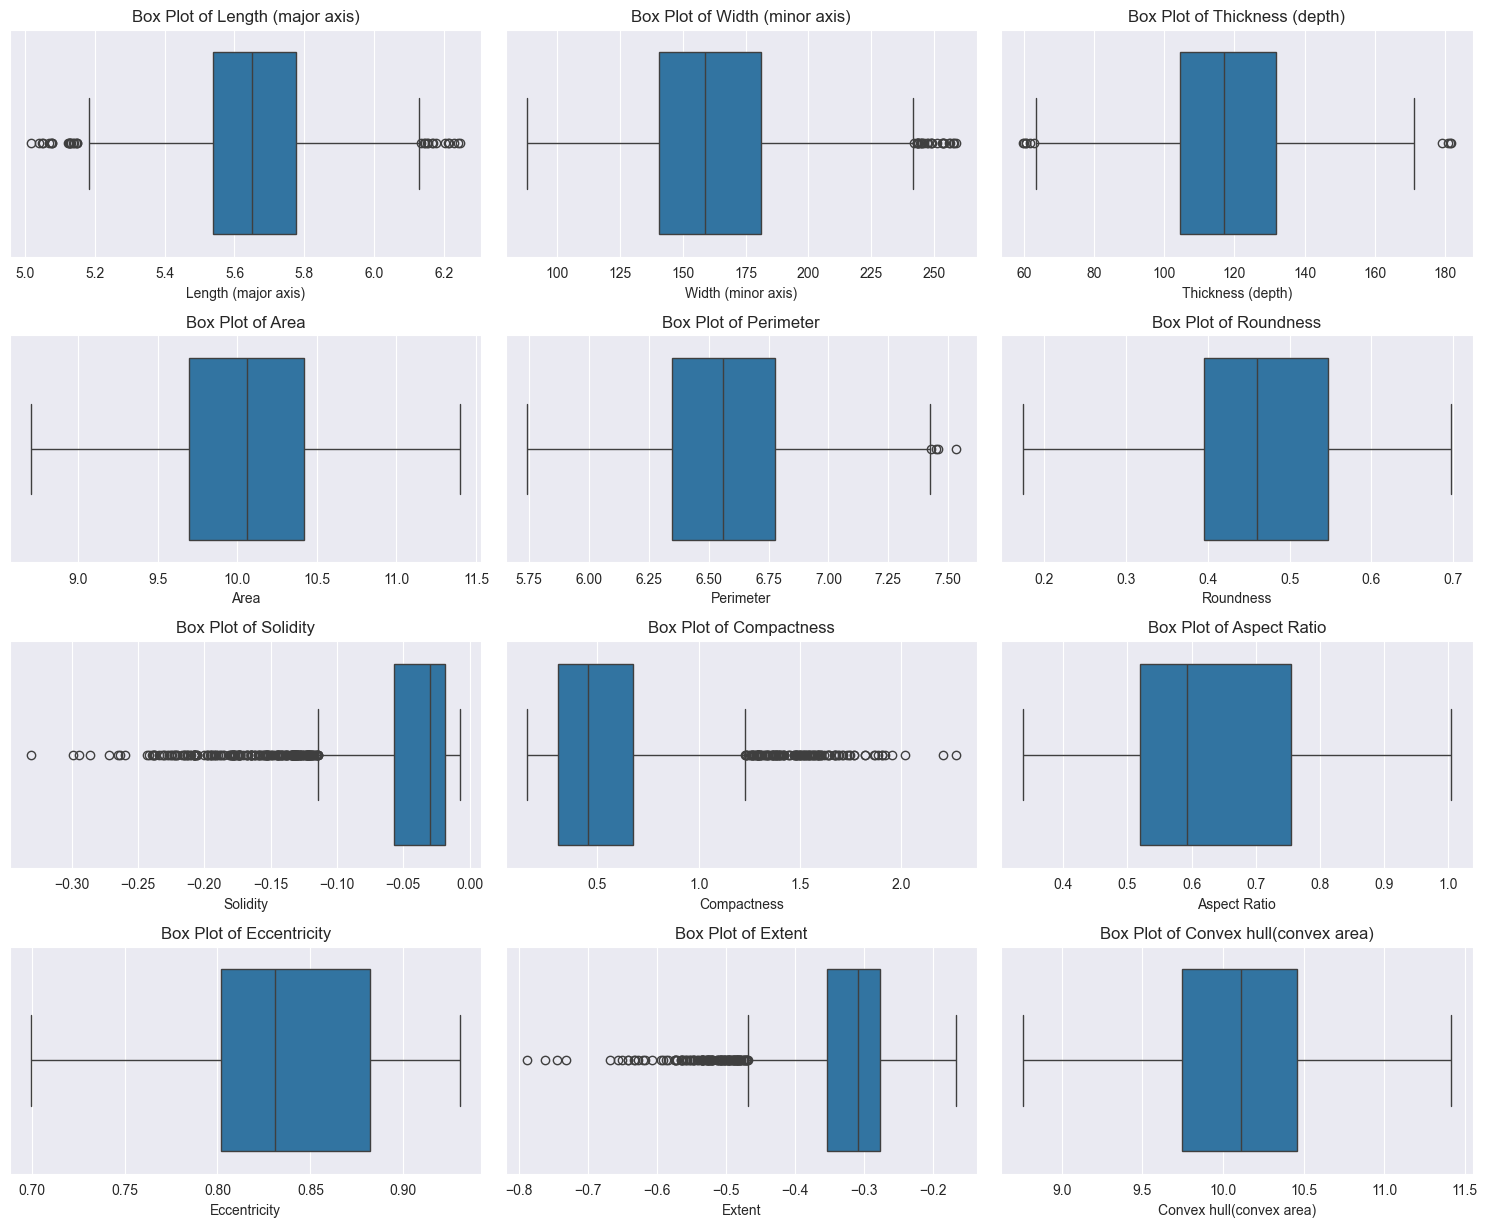

In [680]:
# Plot box plots for each numeric column
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns, 1):
    if column == 'Type':
        continue
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust the layout: 3 columns in each row
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

<h3>4.2. Normalize the features data</h3>

In [681]:
scaler = MinMaxScaler()

columns_to_scale: List[str] = df.columns.tolist()
columns_to_scale.remove('Type')

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.534123,0.820377,0.557943,0.490325,0.405617,0.499504,0.938587,0.106338,0.311887,0.493264,0.651454,0.487841,0
1,0.615069,0.857015,0.561542,0.497139,0.436986,0.406071,0.887029,0.150723,0.388790,0.581822,0.591640,0.501015,0
2,0.713217,0.829045,0.541902,0.486490,0.408328,0.381085,0.919086,0.115806,0.426075,0.620445,0.657182,0.486324,0
3,0.719486,0.848659,0.542902,0.489660,0.420533,0.286098,0.913455,0.132414,0.421816,0.616090,0.661276,0.490222,0
4,0.596228,0.833338,0.390346,0.426930,0.388903,0.319988,0.868042,0.158784,0.426075,0.620445,0.729001,0.432158,0
